### 1. 데이터 불러오기

In [22]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((878049, 9), (884262, 7))

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [25]:
# 이번 캐글 : 시공간 데이터를 활용하여 범죄 유형을 예측하는 문제?

In [26]:
sample = pd.read_csv('sampleSubmission.csv')
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Id                           884262 non-null  int64
 1   ARSON                        884262 non-null  int64
 2   ASSAULT                      884262 non-null  int64
 3   BAD CHECKS                   884262 non-null  int64
 4   BRIBERY                      884262 non-null  int64
 5   BURGLARY                     884262 non-null  int64
 6   DISORDERLY CONDUCT           884262 non-null  int64
 7   DRIVING UNDER THE INFLUENCE  884262 non-null  int64
 8   DRUG/NARCOTIC                884262 non-null  int64
 9   DRUNKENNESS                  884262 non-null  int64
 10  EMBEZZLEMENT                 884262 non-null  int64
 11  EXTORTION                    884262 non-null  int64
 12  FAMILY OFFENSES              884262 non-null  int64
 13  FORGERY/COUNTERFEITING       

### 2. EDA

In [27]:
# 2-1. 데이터 복제
# 이유 : 다양한 형태로 가공, 전처리를 할 수도 있기 때문
train_df = train.copy()
train_df.shape == train.shape

True

In [28]:
# 2-2. 결측치, 중복값이 있는지 확인
def check_na(data):
    isnull_na = (data.isnull().sum() / len(data)) * 100
    data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({'Missing Ratio' : data_na,
                                'Data Type' : data.dtypes[data_na.index]})
    print('결측치 데이터 칼럼과 건수 : \n', missing_data)
    
check_na(train_df)

# isnull_na = (data.isnull().sum() / len(data)) * 100
# 결측치 비율 계산
# 데이터 프레임의 각 열에서 결측치(NaN)의 개수를 전체 데이터의 수로 나누어 그 비율(%)을 계산

# isnull_na.drop(isnull_na[isnull_na == 0].index)
# 결측치가 없는 열을 제거 : 결측치 있는 열만 남김

# sort_values(ascending=False)
# 결측치 비율이 높은 열부터 내림차순으로 정렬

# pd.DataFrame({'Missing Ratio': data_na, 'Data Type': data.dtypes[data_na.index]})
# 결측치 비율과 데이터 타입으로 데이터 프레임 생성

결측치 데이터 칼럼과 건수 : 
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [29]:
# 결측치가 없는 것을 확인했음
# 2-3. 이번에는 중복 데이터가 있는지 확인
train_df.duplicated().sum()

2323

In [30]:
# 2-4. 2323개의 중복 데이터를 제거
print('Before :', train_df.shape)
train_df.drop_duplicates(inplace = True)
print('After :', train_df.shape)

Before : (878049, 9)
After : (875726, 9)


In [31]:
# 2-5. 범죄 내용과 관련된 두 개의 변수를 삭제
train_df.drop(['Descript', 'Resolution'], axis = 1, inplace = True)
train_df.shape

(875726, 7)

In [33]:
# 2-6. 종속 변수에 해당하는 Category 데이터의 상위 5개, 하위 5개 출력
# Category 데이터 상위5개
train_df['Category'].value_counts()[:5]

# LARCENY : 절도죄
# THEFT : 절도
# OTHER OFFENSES : 기타 범죄
# ASSAULT : 폭행
# DRUG : 의약품
# NARCOTIC : 마약

# 절도죄가 174320건, 폭행 76815건, 마약 53919건 등이 많음을 알 수 있다.

LARCENY/THEFT     174320
OTHER OFFENSES    125960
NON-CRIMINAL       91915
ASSAULT            76815
DRUG/NARCOTIC      53919
Name: Category, dtype: int64

In [34]:
train_df['Category'].value_counts()[-5:]

EXTORTION                    256
SEX OFFENSES NON FORCIBLE    148
GAMBLING                     146
PORNOGRAPHY/OBSCENE MAT       22
TREA                           6
Name: Category, dtype: int64

In [35]:
# EXTORTION : 강요, 협박
# SEX OFFENSES NON FORCIBLE : 성범죄?
# GAMBLING : 도박
# PORNOGRAPHY : 포르노
# OBSCENE MAT : 음란한 매트

In [36]:
# 2-7. 요일별 범죄 발생 건수
temp = train_df.groupby('DayOfWeek').count().iloc[:, 0]
temp = temp.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(temp)

DayOfWeek
Monday       121303
Tuesday      124603
Wednesday    128829
Thursday     124757
Friday       133371
Saturday     126469
Sunday       116394
Name: Dates, dtype: int64


In [37]:
# 샌프란시스코에서는 금요일에 범죄가 가장 많이 일어나고(133371건),
# 일요일에 범죄가 가장 적게 일어나는 것 같다(116394건).
# 그런데 개인적인 시각으로는 요일별 편차가 크게 느껴지지는 않는다.

In [43]:
# 시각화
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib import cm
# import numpy as np

# fig, ax = plt.subplots(figsize = (10, 6))

# ax = sns.barplot(temp.index, (temp.values / temp.values.sum()) * 100, orient = 'v')
# ax.set_title('Incident Rates Rates', fontdict = {'fontsize' : 16})
# ax.set_xlabel('Weekday')
# ax.set_ylabel('Incidents (%)')

# plt.show()

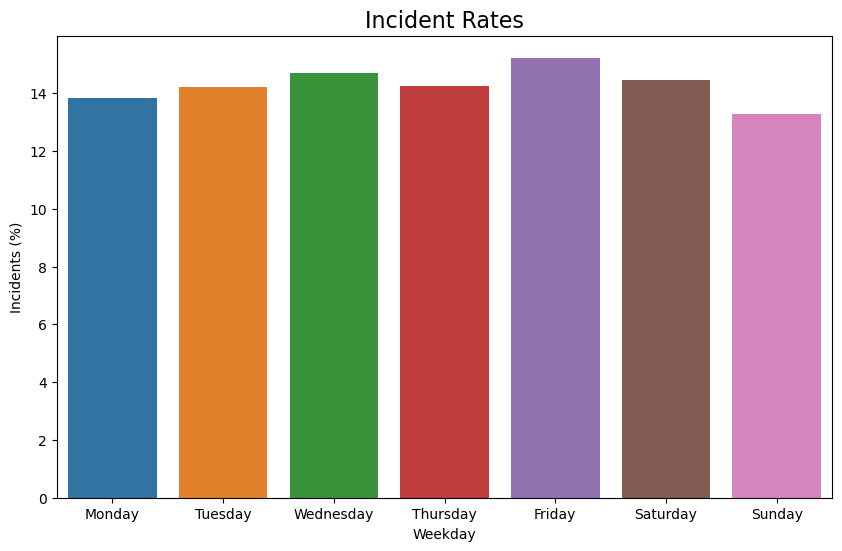

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# 'orient' 파라미터 제거
ax = sns.barplot(x=temp.index, y=(temp.values / temp.values.sum()) * 100)

# 제목 및 축 라벨 설정
ax.set_title('Incident Rates', fontdict={'fontsize': 16})
ax.set_xlabel('Weekday')
ax.set_ylabel('Incidents (%)')

plt.show()

In [45]:
# 2-8. 범죄 유형이 요일마다 어떻게 다른지 확인
print('DayOfWeek Incident for each category in percentage\n')
for idx, data in enumerate(train_df.groupby(['Category'])['DayOfWeek']):
    print('The Current index is :', data[0])
    print(round(data[1].value_counts() / data[1].count() * 100, 1))
    print()
    if idx == 3:
        break

DayOfWeek Incident for each category in percentage

The Current index is : ARSON
Tuesday      15.5
Monday       15.1
Friday       14.6
Saturday     14.5
Sunday       14.0
Wednesday    13.2
Thursday     13.2
Name: DayOfWeek, dtype: float64

The Current index is : ASSAULT
Sunday       15.7
Saturday     15.6
Friday       14.5
Monday       13.7
Wednesday    13.7
Tuesday      13.4
Thursday     13.3
Name: DayOfWeek, dtype: float64

The Current index is : BAD CHECKS
Tuesday      18.7
Wednesday    17.5
Thursday     16.3
Monday       16.3
Friday       15.3
Saturday     11.1
Sunday        4.9
Name: DayOfWeek, dtype: float64

The Current index is : BRIBERY
Friday       17.0
Saturday     14.5
Monday       14.2
Sunday       14.2
Wednesday    13.8
Thursday     13.5
Tuesday      12.8
Name: DayOfWeek, dtype: float64



In [46]:
# 전체를 확인하기엔 너무 많기 때문에 4개만 확인했다. 전체를 확인하고 싶을 땐 if문을 삭제하면 된다.

In [47]:
# 2-9. PdDistrict 별 확인
# 지역별 의미로 해석했음

temp = train_df.groupby('PdDistrict').count().iloc[:, 0]
print(temp)

PdDistrict
BAYVIEW        89098
CENTRAL        85267
INGLESIDE      78722
MISSION       119723
NORTHERN      105105
PARK           49161
RICHMOND       45080
SOUTHERN      156528
TARAVAL        65400
TENDERLOIN     81642
Name: Dates, dtype: int64


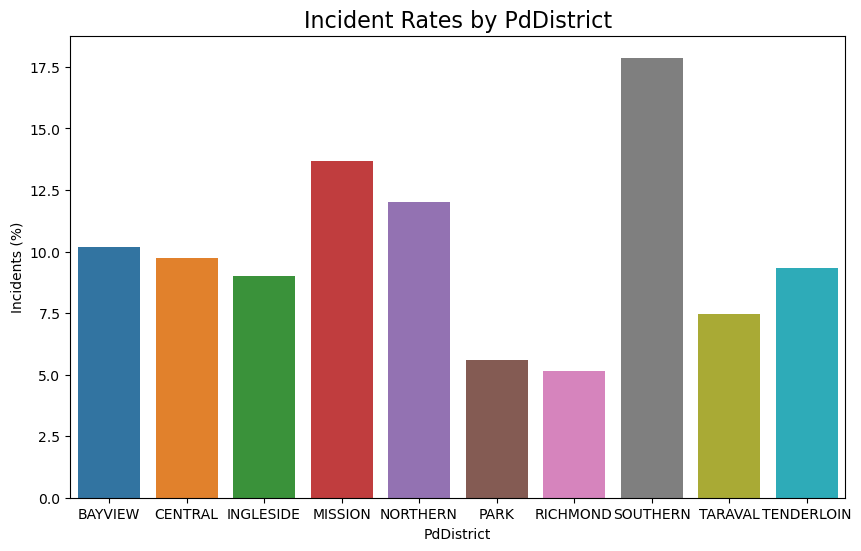

In [55]:
fig, ax = plt.subplots(figsize = (10, 6))

ax = sns.barplot(x = temp.index, y = (temp.values / temp.values.sum()) * 100
    )
ax.set_title('Incident Rates by PdDistrict', fontdict = {'fontsize' : 16})
ax.set_xlabel('PdDistrict')
ax.set_ylabel('Incidents (%)')
plt.show()

In [58]:
# 비율로 봤을 때 SOUTHERN이 범죄가 가장 많고, 이어서 NISSION, NORTHERN의 순서대로 범죄비율이 높은 것을 확인하였음.

In [59]:
# 2-10. 범죄 유형이 지역마다 어떻게 다른가?
print('DayOfWeek Incident for each category in percentage\n')
for idx, data in enumerate(train_df.groupby(['Category'])['PdDistrict']):
    
    print('The Current index is:', data[0])
    print(round(data[1].value_counts() / data[1].count() * 100, 1))
    print()
    if idx == 3:
        break

DayOfWeek Incident for each category in percentage

The Current index is: ARSON
BAYVIEW       26.0
SOUTHERN      12.2
INGLESIDE     12.0
NORTHERN       9.9
MISSION        9.5
TARAVAL        7.9
CENTRAL        7.3
RICHMOND       6.8
PARK           4.3
TENDERLOIN     4.0
Name: PdDistrict, dtype: float64

The Current index is: ASSAULT
SOUTHERN      15.8
MISSION       14.5
BAYVIEW       12.8
INGLESIDE     11.1
NORTHERN      10.8
TENDERLOIN    10.0
CENTRAL        9.1
TARAVAL        7.1
PARK           4.6
RICHMOND       4.2
Name: PdDistrict, dtype: float64

The Current index is: BAD CHECKS
SOUTHERN      18.2
CENTRAL       16.0
NORTHERN      13.3
MISSION       11.3
TARAVAL        8.9
BAYVIEW        8.4
INGLESIDE      7.9
RICHMOND       7.6
TENDERLOIN     4.7
PARK           3.7
Name: PdDistrict, dtype: float64

The Current index is: BRIBERY
MISSION       22.8
BAYVIEW       19.4
INGLESIDE     18.3
SOUTHERN      12.8
NORTHERN       6.2
TARAVAL        5.9
TENDERLOIN     5.2
CENTRAL        4.2
RIC

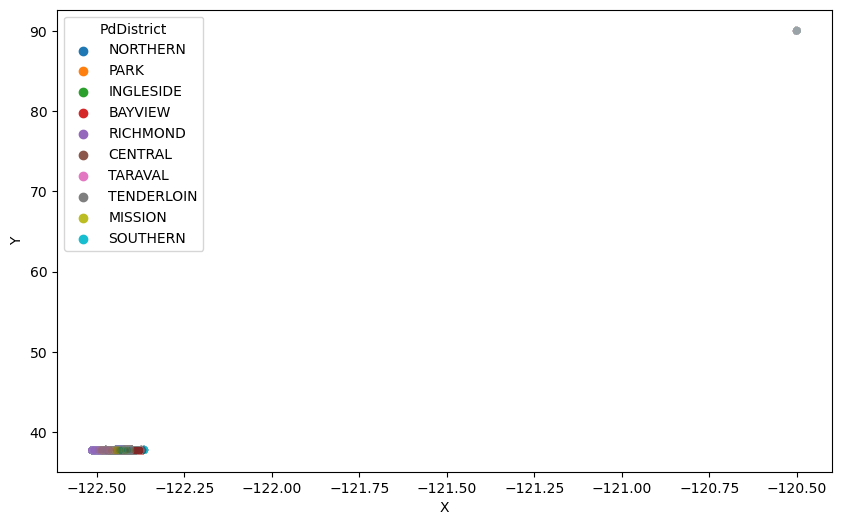

In [60]:
# 2-11. 위도, 경도 시각화
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'X', y = 'Y',
               data = train_df, alpha = 0.01, hue = 'PdDistrict', ax = ax)
plt.show()

In [61]:
# 이상치가 있는 것을 확인할 수 있고, 어떤 값을 제거해야 하는지 확인
print('Y > 90 :', train_df.loc[train.Y > 90].count()[0])
print('Y < 90 :', train_df.loc[train.Y < 90].count()[0])

Y > 90 : 0
Y < 90 : 875659


In [62]:
print(train_df.shape)
train_df = train_df[train_df['Y'] < 90]
print(train_df.shape)

(875726, 7)
(875659, 7)


C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


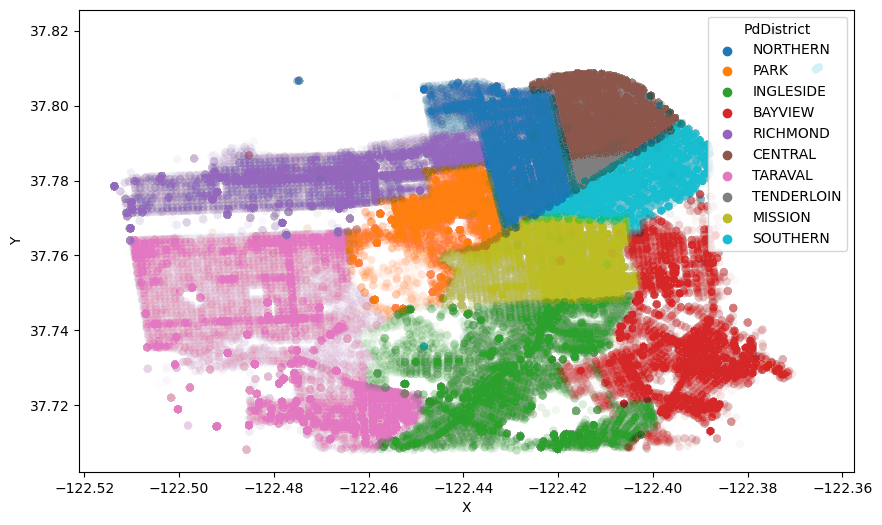

In [63]:
# 이상치 제거 후 산점도를 다시 그림
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'X', y = 'Y',
               data = train_df, alpha = 0.01, hue = 'PdDistrict', ax = ax)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


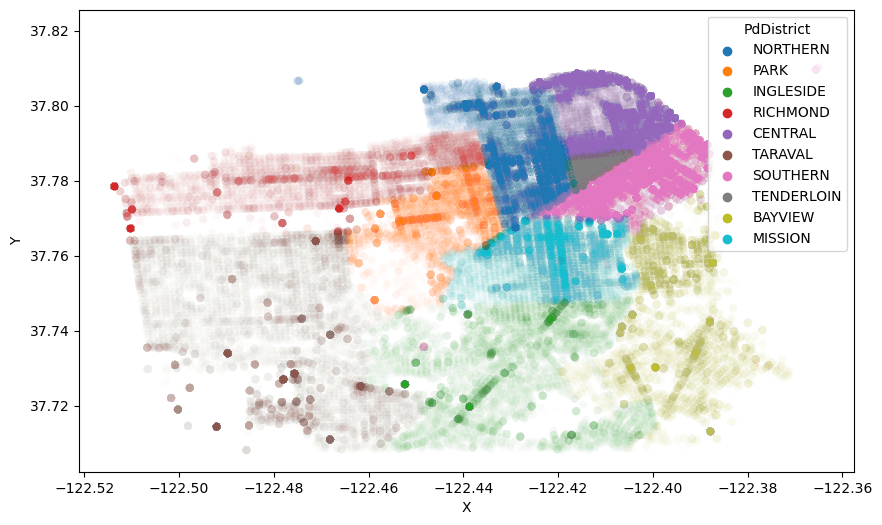

In [64]:
# 산점도를 그려보면 각 지역별로 그룹화가 된 것을 확인할 수 있다. 
# 한 단계 더 깊숙이 탐색하려면 범죄 유형을 세분화해 살펴보는 것도 방법. 
# 예시로 LARCENY/THEFT의 값을 추출한 뒤 시각화했음

# LARCENY/THEFT 값의 데이터만 추출한 뒤 시각화(세분화)

theft_df = train_df[train_df['Category'] == 'LARCENY/THEFT']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'X', y = 'Y',
               data = theft_df, alpha = 0.01, hue = 'PdDistrict', ax = ax)
plt.show()

In [65]:
# 시각화 결과, 어느 지역에서 해당 범죄가 많이 일어나는지 확인 가능
# 전체적으로 보면 NORTHERN, SOUTHERN, CENTRAL 관할 지역에서 절도 범죄가 많이 일어나며,
# 상대적으로 RICHMOND, TARAVAL 지역에서는 덜 일어나는 것을 확인할 수 있다.

In [66]:
# 2-12. 날짜 데이터의 유형 확인
train_df['Dates'].dtypes

dtype('O')

In [67]:
# 0 : object를 의미, 문자형 데이터이다.
# 따라서 이것을 날짜 데이터로 변환해야 한다.
train_df['Dates'] = pd.to_datetime(train_df['Dates'])
train_df['Dates'].sample(1)

582477   2007-02-11 13:34:00
Name: Dates, dtype: datetime64[ns]

In [68]:
# 2-13. 날짜 데이터를 연월일 시분초로 나누어 추출
# 하루 평균 몇 건의 범죄가 발생되는지 등 다양한 추이를 확인 가능

train_df['Date'] = train_df.Dates.dt.date
train_df['Hour'] = train_df.Dates.dt.hour
daily_df = train_df.groupby('Date').count().iloc[:, 0]
daily_df

Date
2003-01-06    400
2003-01-07    417
2003-01-08    523
2003-01-09    416
2003-01-10    397
             ... 
2015-05-02    376
2015-05-03    375
2015-05-11    425
2015-05-12    330
2015-05-13    362
Name: Dates, Length: 2249, dtype: int64

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

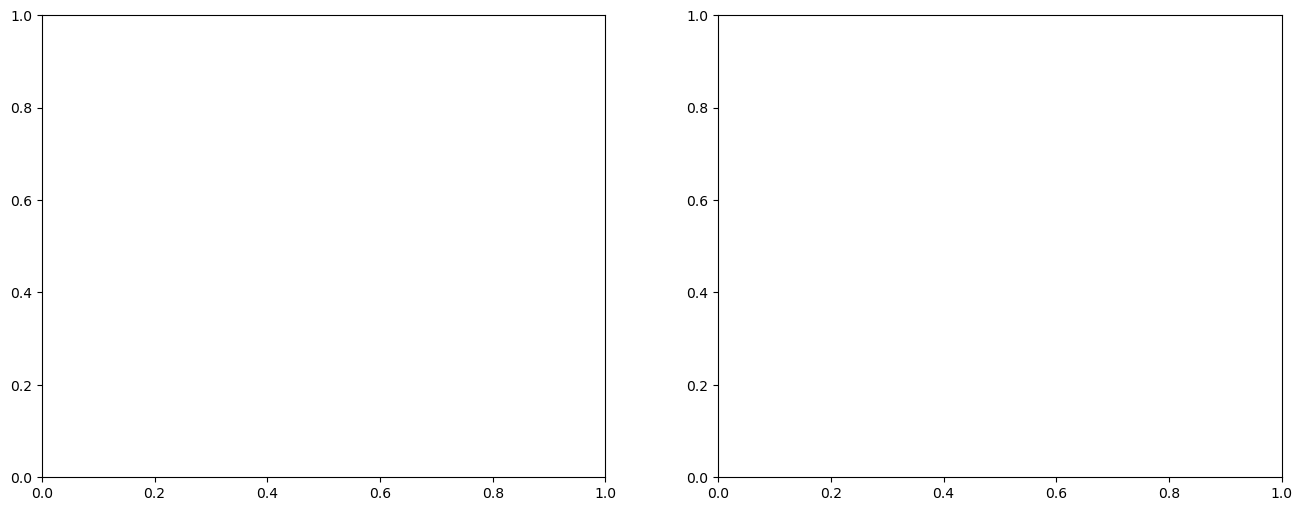

In [69]:
# 2-14. 일자별 시계열 데이터와 일 평균 데이터 건수 확인
# col = sns.color_palette()

# fig, ax = plt.subplots(ncols = 2, figsize = (16, 6))
# sns.lineplot(daily_df.index, daily_df.values, ax = ax[0])
# ax[0].set_title(
#     'Number of incidents per day', fontdict = {'fontsize' : 16})
# ax[0].set_ylabel('Incidents')

# sns.kdeplot(data = daily_df, shade = True, ax = ax[1])
# ax[1].axvline(x = daily_df.median(), ymax = 0.95, linestyle = '-', color = col[1])
# ax[1].annotate(
#     'Median : '+str(daily_df.median()),
#     xy = (daily_df.median(), 0.004),
#     xytext = (200, 0.005),
#     arrowprops = dict(arrowstyle = '->', color = col[1], shrinkB = 10))
# ax[1].set_title(
#     'Disstribution of number of incidents per day', fontdict = {'fontsize' : 16})
# ax[1].set_xlabel('Incidents')
# ax[1].set_ylabel('Density')

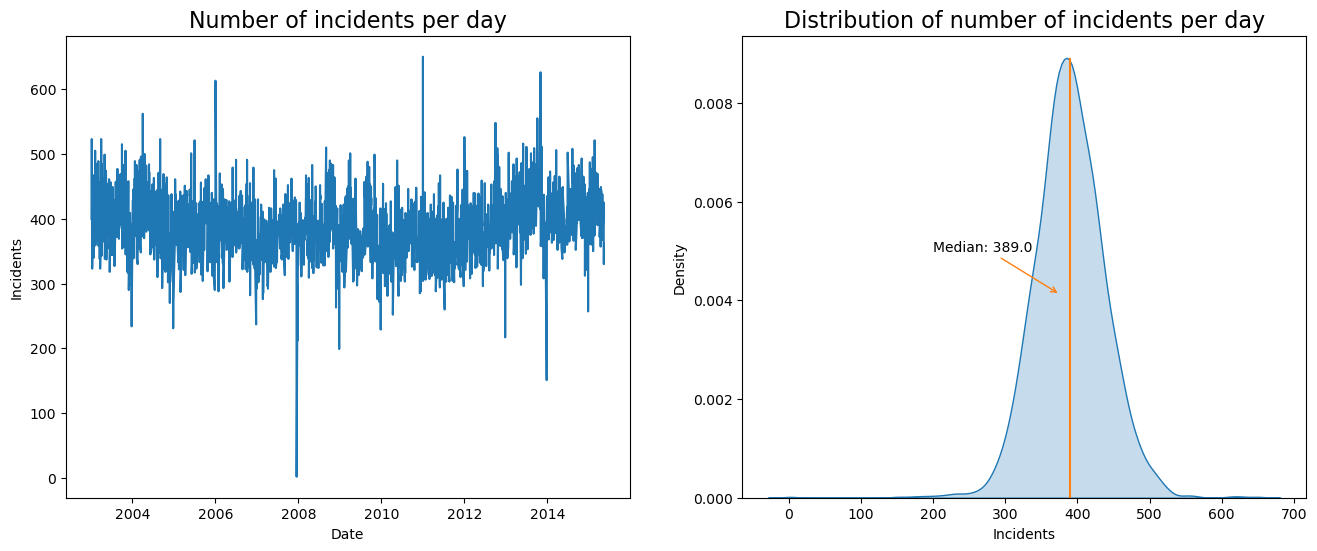

In [70]:
# 예시 데이터프레임 (daily_df가 pandas Series라고 가정)
# daily_df = pd.Series([...])  # 데이터가 있어야 함

col = sns.color_palette()

fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

# 1. 라인 플롯 (x와 y 명시)
sns.lineplot(x=daily_df.index, y=daily_df.values, ax=ax[0])
ax[0].set_title('Number of incidents per day', fontdict={'fontsize': 16})
ax[0].set_ylabel('Incidents')

# 2. KDE 플롯 (shade -> fill로 수정)
sns.kdeplot(data=daily_df, fill=True, ax=ax[1])
ax[1].axvline(x=daily_df.median(), ymax=0.95, linestyle='-', color=col[1])

# 주석 추가 (텍스트 위치 및 좌표 조정 가능)
ax[1].annotate(
    'Median: ' + str(daily_df.median()),
    xy=(daily_df.median(), 0.004),  # x와 y의 위치
    xytext=(200, 0.005),  # 주석을 위한 텍스트 위치
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# 제목 및 축 레이블 설정
ax[1].set_title('Distribution of number of incidents per day', fontdict={'fontsize': 16})
ax[1].set_xlabel('Incidents')
ax[1].set_ylabel('Density')

plt.show()

In [71]:
# 이상치가 있으므로 범죄 발생 건수가 가장 많은날/적은날 확인
print('The minimum Incident day :\n', daily_df[daily_df.values == min(daily_df.values)])
print('The maximum Incident day :\n', daily_df[daily_df.values == max(daily_df.values)])

The minimum Incident day :
 Date
2007-12-16    2
Name: Dates, dtype: int64
The maximum Incident day :
 Date
2011-01-01    650
Name: Dates, dtype: int64


The minimum Incident hour :
 Hour
5    8609
Name: Dates, dtype: int64
The maximum Incident hour :
 Hour
18    54969
Name: Dates, dtype: int64


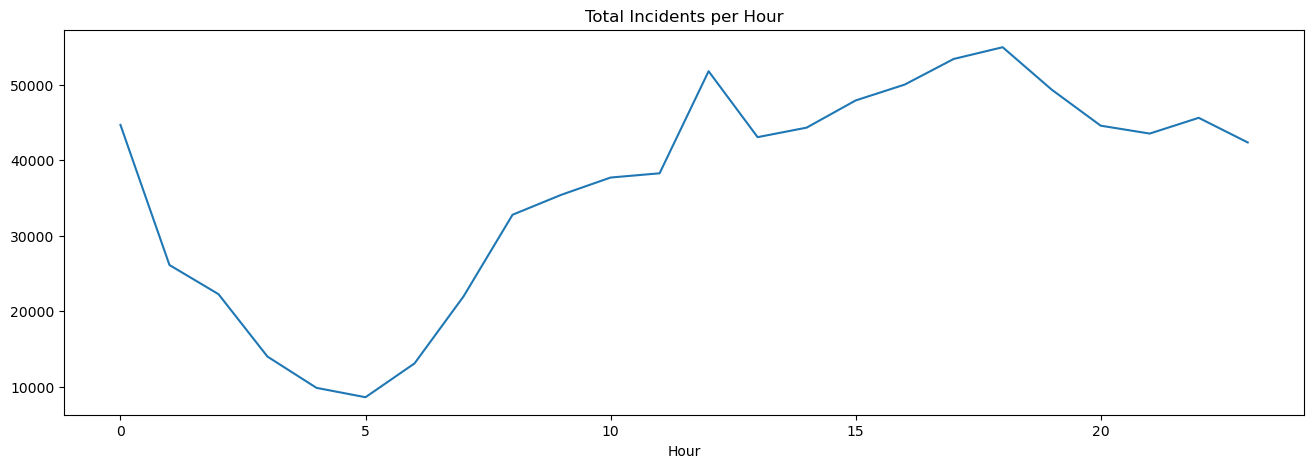

In [72]:
# 2-15. 하루 시간대별 범죄 발생 확인
hour_df = train_df.groupby('Hour').count().iloc[:, 0]
print('The minimum Incident hour :\n', hour_df[hour_df.values == min(hour_df.values)])
print('The maximum Incident hour :\n', hour_df[hour_df.values == max(hour_df.values)])

fig, ax = plt.subplots(figsize = (16, 5))
ax = sns.lineplot(x = hour_df.index, y = hour_df.values)
plt.title('Total Incidents per Hour')
plt.show()

### 3. 피처 엔지니어링

In [73]:
# 피처 엔지니어링을 진행할 때는 가급적 하나의 함수로 만드는 것이 좋다.
# 공통으로 처리해야 하는 내용과 각 데이터마다 전처리의 성질이 조금 다른 것을 구분하는 것이 좋다.

In [74]:
# 피처 엔지니어링

def feature_engineering(data):
    
    data.drop_duplicates(inplace = True)
    data['Dates'] = pd.to_datetime(data['Dates'])
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data.drop(columns = ['Dates', 'Date', 'Address'], inplace = True)
    
    if 'Id' in data.columns:
        data.drop(['Id'], axis = 1, inplace = True)
    else:
        data.drop(['Descript', 'Resolution'], axis = 1, inplace = True)
        
    return data

In [75]:
# 중복 값 제거와 날짜 데이터 변환은 Train 데이터와 Test 데이터 모두 공통적인 내용이다. 
# 그런데 Train 데이터에만 Descript, Resolution 변수가 존재하는 것을 확인할 수 있고, 
# Test 데이터에만 Id 값이 주어진 것을 확인할 수 있다. 
# 따라서 if 조건문으로 관련 변수를 삭제한다. 그리고 데이터를 확인해보자.

In [76]:
train = feature_engineering(train)
test = feature_engineering(test)
train.shape, test.shape

((875726, 8), (884262, 7))

In [77]:
# Tree-Model 기반의 모형으로 진행해 별도의 Scaling은 진행하지 않을 것이다. 
# 종속 변수에 해당하는 PdDistrict 지역에 Label Encoding을 적용해보자.

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.fit_transform(test['PdDistrict'])

le2 = LabelEncoder()

X = train.drop(columns = ['Category'])
y = le2.fit_transform(train['Category'])

In [81]:
# 2. 모델링 : 기본 모델 구축
# 다중 분류 모형이기 때문에 다중 분류에 해당하는 파라미터를 설정

import lightgbm as lgb

train_set =lgb.Dataset(
    X, label = y, categorical_feature = ['PdDistrict'], free_raw_data = False)

params = {'objective' : 'multiclass',
         'num_class' : 39}

lgbm_b0 = lgb.train(params, train_set, num_boost_round = 6)
preds = lgbm_b0.predict(test)
preds

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 875726, number of used features: 7
[LightGBM] [Info] Start training from score -6.361620
[LightGBM] [Info] Start training from score -2.433653
[LightGBM] [Info] Start training from score -7.676455
[LightGBM] [Info] Start training from score -8.016382
[LightGBM] [Info] Start training from score -3.175005
[LightGBM] [Info] Start training from score -5.313420
[LightGBM] [Info] Start training from score -5.956155
[LightGBM] [Info] Start training from score -2.787570
[LightGBM] [Info] Start training from score -5.321801
[LightGBM] [Info] Start training from score -6.623191
[LightGBM] [Info] Start training from score -8.137631
[LightGBM] [Info] Start training from score -7.492493


array([[0.00238131, 0.10568356, 0.00033146, ..., 0.08047631, 0.04487315,
        0.01431285],
       [0.00218025, 0.09676068, 0.00030348, ..., 0.06167561, 0.05417249,
        0.01566235],
       [0.00134678, 0.06751397, 0.00028781, ..., 0.06092123, 0.0365621 ,
        0.00726739],
       ...,
       [0.00254849, 0.09095779, 0.00121705, ..., 0.11169131, 0.04146174,
        0.01096454],
       [0.00489532, 0.09039395, 0.00117022, ..., 0.08811935, 0.04836821,
        0.01167798],
       [0.00223485, 0.08410317, 0.00120292, ..., 0.1103952 , 0.03387935,
        0.00809747]])

In [82]:
# !pip install lightgbm

In [83]:
# 예측값을 출력했다. 위 코드에 Params에 있는 값만 계속 변경되고, 교차 검증을 수행한다면 Num_Boost_Round의 값도 변경된다. 
# 예측값을 Submission 형태로 바꿔 제출을 진행하면 된다. 
# 이후 성능을 조금 더 올리기 위해 GridSearch나 RandomSearch 교차 검증을 진행하면 된다.